In [6]:
import os
import pandas as pd
import numpy as np

# 参数设置
window_size = 28
step_size = 14

# 读取数据
input_file = '../DATA/Labeled_data/0910-7ST-S1/labeled_data.csv'


df = pd.read_csv(input_file)

# 初始化存储窗口信息的列表
windowed_data = []

# 初始化 window_id
window_id = 0

normalization = False

""" 
Iterates over the data in step_size increments, creating windows of window_size length.
"""
# 循环以 step_size 步长遍历数据
for start in range(0, len(df) - window_size + 1, step_size):
    end = start + window_size

    window = df.iloc[start:end].copy()

    if normalization:
        cols_to_normalize = [
            'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 
            'de0', 'de1', 'de2', 'de3', 'de4', 'de5', 'de6', 
            'tau_J0', 'tau_J1', 'tau_J2', 'tau_J3', 'tau_J4', 'tau_J5', 'tau_J6', 
            'tau_ext0', 'tau_ext1', 'tau_ext2', 'tau_ext3', 'tau_ext4', 'tau_ext5', 'tau_ext6'
        ]
        
        # 对每一列进行归一化
        for col in cols_to_normalize:
            mean_col = np.mean(window[col])
            std_col = np.std(window[col])
            # window[col] = (window[col] - mean_col) / (std_col + 1e-5)
            window[col] = window[col] / (std_col + 1e-5)

    # 生成 window_id
    window['window_id'] = window_id
    window_id += 1  # 每次迭代增加 window_id
    
    # 判断窗口内 touch_type 是否全为 'NC'
    unique_touch_types = window['label'].unique()
    if len(unique_touch_types) == 1 and unique_touch_types[0] == 0:
        window_touch_type = 0
    else:
        # 如果不是全为 'NC'，取窗口内唯一的非 'NC' 的 touch_type
        non_nc_touch_types = [t for t in unique_touch_types if t != 0]
        window_touch_type = non_nc_touch_types[0] if non_nc_touch_types else 0
    
    # 给窗口内所有行赋值 window_touch_type
    window['window_touch_type'] = window_touch_type
    
    # 添加窗口数据到列表
    windowed_data.append(window)

# 合并所有窗口数据
windowed_df = pd.concat(windowed_data, ignore_index=True)



In [8]:
windowed_df[windowed_df["window_id"]==26]
windowed_df.columns

Index(['index', 'time', 'tau_J0', 'tau_J1', 'tau_J2', 'tau_J3', 'tau_J4',
       'tau_J5', 'tau_J6', 'tau_J_d0', 'tau_J_d1', 'tau_J_d2', 'tau_J_d3',
       'tau_J_d4', 'tau_J_d5', 'tau_J_d6', 'tau_ext0', 'tau_ext1', 'tau_ext2',
       'tau_ext3', 'tau_ext4', 'tau_ext5', 'tau_ext6', 'q0', 'q1', 'q2', 'q3',
       'q4', 'q5', 'q6', 'q_d0', 'q_d1', 'q_d2', 'q_d3', 'q_d4', 'q_d5',
       'q_d6', 'dq0', 'dq1', 'dq2', 'dq3', 'dq4', 'dq5', 'dq6', 'dq_d0',
       'dq_d1', 'dq_d2', 'dq_d3', 'dq_d4', 'dq_d5', 'dq_d6', 'e0', 'e1', 'e2',
       'e3', 'e4', 'e5', 'e6', 'de0', 'de1', 'de2', 'de3', 'de4', 'de5', 'de6',
       'etau_J0', 'etau_J1', 'etau_J2', 'etau_J3', 'etau_J4', 'etau_J5',
       'etau_J6', 'label', 'window_id', 'window_touch_type'],
      dtype='object')

In [12]:
columns_of_interest = ['tau_J0', 'tau_J1', 'tau_J2', 'tau_J3', 'tau_J4', 'tau_J5', 'tau_J6','tau_ext0', 'tau_ext1', 'tau_ext2', 'tau_ext3', 'tau_ext4',
        'tau_ext5', 'tau_ext6','e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6','de0', 'de1', 'de2', 'de3', 'de4', 'de5', 'de6','label', 'window_id', 'window_touch_type']
dt_filter = windowed_df[columns_of_interest]
dt_filter

,tau_J0,tau_J1,tau_J2,tau_J3,tau_J4,tau_J5,tau_J6,tau_ext0,tau_ext1,tau_ext2,...,de0,de1,de2,de3,de4,de5,de6,label,window_id,window_touch_type
0,-0.188623,-33.375355,-1.558116,19.267954,0.492881,2.468151,-0.089855,-0.223846,-0.224337,-0.327781,...,0.000681,-0.000039,0.000710,0.000259,-0.000003,-0.008542,-0.000512,0,0,0
1,-0.188623,-33.375355,-1.558116,19.267954,0.492881,2.468151,-0.089855,-0.223846,-0.224337,-0.327781,...,0.000681,-0.000039,0.000710,0.000259,-0.000003,-0.008542,-0.000512,0,0,0
2,-0.224328,-33.335682,-1.593821,19.267954,0.492881,2.457165,-0.079784,-0.229537,-0.216338,-0.325760,...,0.000338,0.001359,0.000087,-0.000066,0.000462,-0.001171,-0.000977,0,0,0
3,-0.224328,-33.335682,-1.593821,19.267954,0.492881,2.457165,-0.079784,-0.229537,-0.216338,-0.325760,...,0.000338,0.001359,0.000087,-0.000066,0.000462,-0.001171,-0.000977,0,0,0
4,-0.264001,-33.415028,-1.593821,19.232248,0.492881,2.478222,-0.008373,-0.225454,-0.214072,-0.318435,...,-0.001247,-0.001011,0.000429,-0.001111,0.000033,0.000297,0.001853,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21723,-0.264001,-33.375355,-1.629527,19.232248,0.502036,2.457165,-0.018444,-0.231031,-0.211868,-0.312527,...,-0.000378,0.000500,-0.000116,-0.000068,-0.000444,-0.000864,0.000836,0,775,0
21724,-0.264001,-33.375355,-1.629527,19.232248,0.502036,2.457165,-0.018444,-0.231031,-0.211868,-0.312527,...,-0.000378,0.000500,-0.000116,-0.000068,-0.000444,-0.000864,0.000836,0,775,0
21725,-0.188623,-33.415028,-1.593821,19.232248,0.511192,2.478222,-0.059643,-0.251495,-0.199112,-0.332039,...,0.001418,-0.001519,0.000853,-0.000015,0.000271,0.000447,0.000338,0,775,0
21726,-0.188623,-33.415028,-1.593821,19.232248,0.511192,2.478222,-0.059643,-0.251495,-0.199112,-0.332039,...,0.001418,-0.001519,0.000853,-0.000015,0.000271,0.000447,0.000338,0,775,0


In [18]:

flattened_data = []
flattened_labels = []

# 按 window_id 分组并 flatten
for window_id, group in dt_filter.groupby('window_id'):
    # Flatten 当前窗口数据，排除非数值列
    flattened_window = group.drop(columns=['window_id', 'window_touch_type', 'label']).values.flatten()
    # print(flattened_window.shape)
    flattened_data.append(flattened_window)
    
    # 获取当前窗口的唯一标签 window_touch_type
    flattened_labels.append(group['window_touch_type'].iloc[0])

# 转换为 NumPy 数组
flattened_data = np.array(flattened_data)
flattened_labels = np.array(flattened_labels)

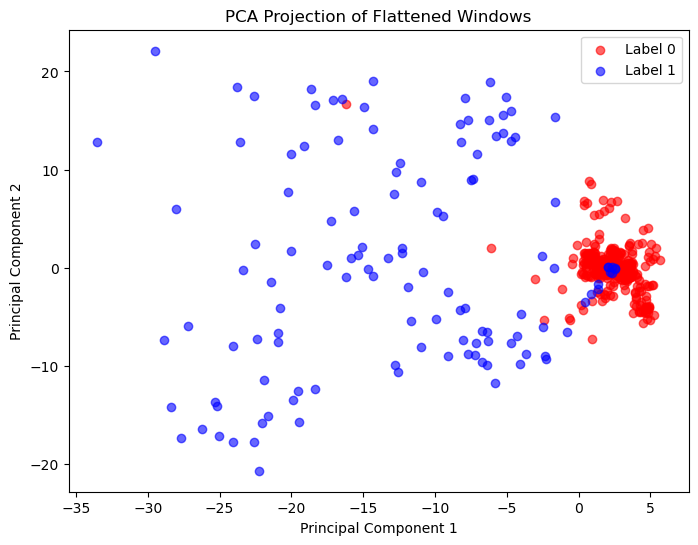

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 降维
pca = PCA(n_components=2)  
reduced_data = pca.fit_transform(flattened_data)

# 可视化降维结果
plt.figure(figsize=(8, 6))
unique_labels = np.unique(flattened_labels)
colors = ['red', 'blue', 'green']  # 可根据类别数量扩展

for i, label in enumerate(unique_labels):
    plt.scatter(reduced_data[flattened_labels == label, 0],
                reduced_data[flattened_labels == label, 1],
                label=f"Label {label}", 
                color=colors[i], 
                alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Flattened Windows')
plt.legend()
plt.show()

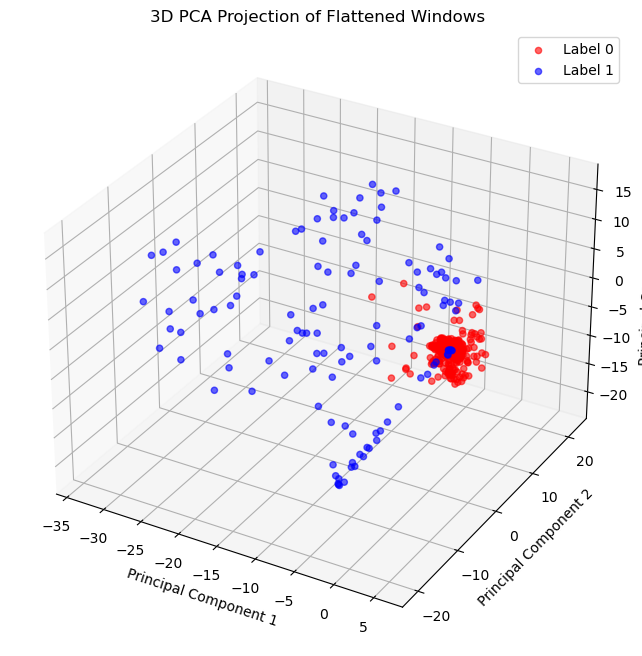

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA 降维到 3 维
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(flattened_data)

# 创建 3D 图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(flattened_labels)
colors = ['red', 'blue', 'green', 'orange', 'purple']  # 可根据类别数量扩展

for i, label in enumerate(unique_labels):
    ax.scatter(reduced_data_3d[flattened_labels == label, 0],
               reduced_data_3d[flattened_labels == label, 1],
               reduced_data_3d[flattened_labels == label, 2],
               label=f"Label {label}", 
               color=colors[i], 
               alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Projection of Flattened Windows')
ax.legend()
plt.show()


/Users/shangyu/anaconda3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


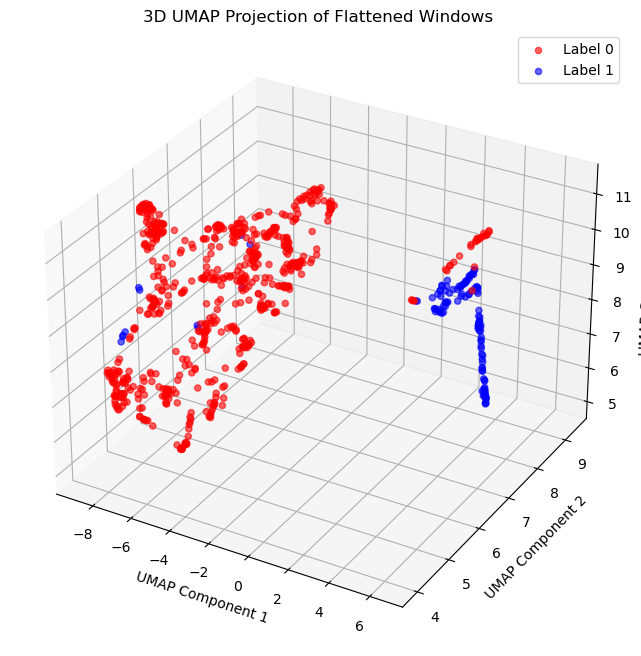

In [21]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# UMAP 降维到 3 维
umap_3d = umap.UMAP(n_components=3, random_state=42)
reduced_data_3d = umap_3d.fit_transform(flattened_data)

# 创建 3D 图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(flattened_labels)
colors = ['red', 'blue', 'green', 'orange', 'purple']  # 可根据类别数量扩展

for i, label in enumerate(unique_labels):
    ax.scatter(reduced_data_3d[flattened_labels == label, 0],
               reduced_data_3d[flattened_labels == label, 1],
               reduced_data_3d[flattened_labels == label, 2],
               label=f"Label {label}", 
               color=colors[i], 
               alpha=0.6)

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('3D UMAP Projection of Flattened Windows')
ax.legend()
plt.show()
